In [16]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
sys.path.append(os.path.join(os.getcwd(), '..'))

from sklearn.datasets import fetch_openml

from utils import *
from models import *

In [17]:
jura_df = fetch_openml(data_id=41554, as_frame=True)

In [18]:
X = jura_df.data
y = jura_df.target

In [19]:
print(X.head())
print(y.head())

    Xloc   Yloc  Landuse_1  Landuse_2  Landuse_3  Landuse_4  Rock_1  Rock_2  \
0  2.386  3.077          0          0          1          0       0       0   
1  2.544  1.972          0          1          0          0       0       1   
2  2.807  3.347          0          1          0          0       0       0   
3  4.308  1.933          0          0          1          0       0       1   
4  4.383  1.081          0          0          1          0       0       0   

   Rock_3  Rock_4  Rock_5     Cr     Ni     Pb     Zn  
0       1       0       0  38.32  21.32  77.36  92.56  
1       0       0       0  40.20  29.72  77.88  73.56  
2       1       0       0  47.00  21.40  30.80  64.80  
3       0       0       0  43.52  29.72  56.40  90.00  
4       0       0       1  38.52  26.20  66.40  88.40  
      Cd     Co     Cu
0  1.740   9.32  25.72
1  1.335  10.00  24.76
2  1.610  10.60   8.88
3  2.150  11.92  22.70
4  1.565  16.32  34.32


In [20]:
# Normalize the data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Turn to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

# Single Task XGBoost

In [21]:
# Only look at first task
y_1 = y[:, 0]

best_model, best_mse, best_r2, average_mse, average_r2 = train_xgboost_single_task(
    input_data=X,
    output_data=y_1,
    k=5
)

print(f"Best MSE: {best_mse}")
print(f"Best R2: {best_r2}")
print(f"Average MSE: {average_mse}")
print(f"Average R2: {average_r2}")

Best MSE: 0.327139237957867
Best R2: 0.6279038487778417
Average MSE: 0.480845266927657
Average R2: 0.5124661557112108


In [22]:
# Only look at second task
y_2 = y[:, 1]

best_model, best_mse, best_r2, average_mse, average_r2 = train_xgboost_single_task(
    input_data=X,
    output_data=y_2,
    k=5
)

print(f"Best MSE: {best_mse}")
print(f"Best R2: {best_r2}")
print(f"Average MSE: {average_mse}")
print(f"Average R2: {average_r2}")

Best MSE: 0.2412033784623537
Best R2: 0.7443698359291588
Average MSE: 0.28506652005117966
Average R2: 0.7088873480270462


In [23]:
# Only look at third task
y_3 = y[:, 2]

best_model, best_mse, best_r2, average_mse, average_r2 = train_xgboost_single_task(
    input_data=X,
    output_data=y_3,
    k=5
)

print(f"Best MSE: {best_mse}")
print(f"Best R2: {best_r2}")
print(f"Average MSE: {average_mse}")
print(f"Average R2: {average_r2}")

Best MSE: 0.11155033994208778
Best R2: 0.850893942810337
Average MSE: 0.33882165416190924
Average R2: 0.7014987096029501


# Multitask XGBoost

In [24]:
best_model, best_mse, best_r2, average_mse, average_r2 = train_xgboost_multi_task(
    input_data=X,
    output_data=y,
    k=5
)

print(f"Best MSE: {best_mse}")
print(f"Best R2: {best_r2}")
print(f"Average MSE: {average_mse}")
print(f"Average R2: {average_r2}")

Best MSE: [0.32462487 0.32822682 0.13700244]
Best R2: [0.63076375 0.69849187 0.75053333]
Average MSE: [0.45263412 0.29917601 0.33397822]
Average R2: [0.53838744 0.69430447 0.70340622]


Some weaker performance but we see slight negative transfer, would be worth doing an HP search with this dataset

# Singletask TabPFN

In [25]:
best_model, best_mse, best_r2, average_mse, average_r2 = train_tabpfn_single_task(
    input_data=X,
    output_data=y_1,
    k=5
)

print(f"Best MSE: {best_mse}")
print(f"Best R2: {best_r2}")
print(f"Average MSE: {average_mse}")
print(f"Average R2: {average_r2}")

Best MSE: 0.3171373097006867
Best R2: 0.6392802860176211
Average MSE: 0.40894190911036904
Average R2: 0.5782823985273418


In [26]:
best_model, best_mse, best_r2, average_mse, average_r2 = train_tabpfn_single_task(
    input_data=X,
    output_data=y_2,
    k=5
)

print(f"Best MSE: {best_mse}")
print(f"Best R2: {best_r2}")
print(f"Average MSE: {average_mse}")
print(f"Average R2: {average_r2}")

Best MSE: 0.17567270153432255
Best R2: 0.8138200144530904
Average MSE: 0.23634494431667288
Average R2: 0.7588675479508558


In [27]:
best_model, best_mse, best_r2, average_mse, average_r2 = train_tabpfn_single_task(
    input_data=X,
    output_data=y_3,
    k=5
)

print(f"Best MSE: {best_mse}")
print(f"Best R2: {best_r2}")
print(f"Average MSE: {average_mse}")
print(f"Average R2: {average_r2}")

Best MSE: 0.10503935365006617
Best R2: 0.8087346685230185
Average MSE: 0.3226487321772598
Average R2: 0.6997527305294512


# HP Search Single task

100%|██████████| 60/60 [00:55<00:00,  1.07it/s]

Best Metrics: {'MSE': 0.45666586317950897, 'R2': 0.5393191973556558}
Best Hyperparameters: {'num_est': 100, 'max_d': 5, 'lr': 0.1}


<Axes: xlabel='learning_rate', ylabel='average_r2'>

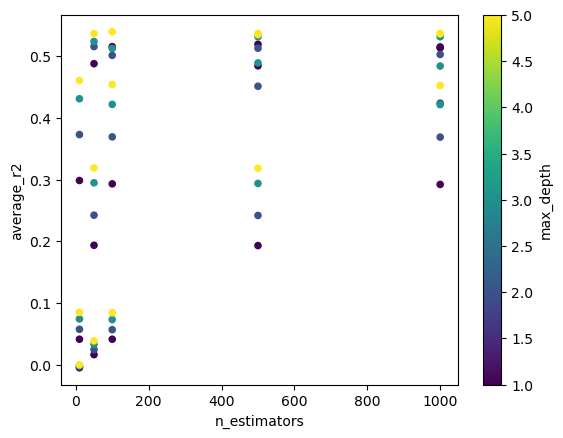

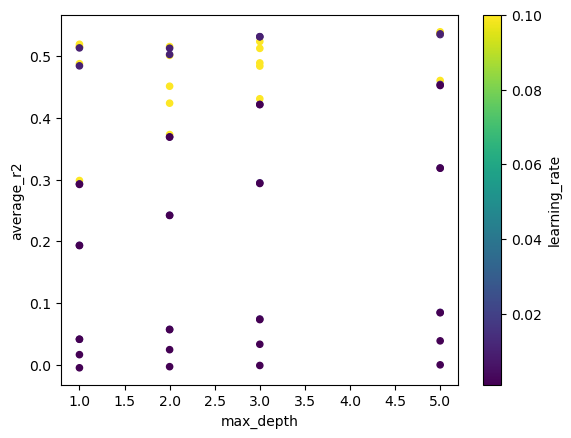

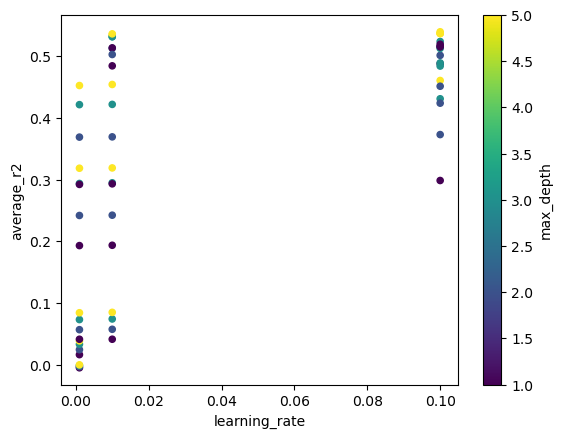

In [28]:
best_metrics, best_hps, full_results = hp_xg_boost_single_task(
    input_data=X,
    output_data=y_1,
    k=5
)

print(f"Best Metrics: {best_metrics}")
print(f"Best Hyperparameters: {best_hps}")

# Save the results
full_results.to_csv("results/jura_single_task_1_results.csv", index=False)

# Plot the results
full_results.plot.scatter(x="n_estimators", y="average_r2", c="max_depth", colormap="viridis")

full_results.plot.scatter(x="max_depth", y="average_r2", c="learning_rate", colormap="viridis")

full_results.plot.scatter(x="learning_rate", y="average_r2", c="max_depth", colormap="viridis")

100%|██████████| 60/60 [00:55<00:00,  1.09it/s]

Best Metrics: {'MSE': 0.27324447664949686, 'R2': 0.7216448825617554}
Best Hyperparameters: {'num_est': 100, 'max_d': 5, 'lr': 0.1}


<Axes: xlabel='learning_rate', ylabel='average_r2'>

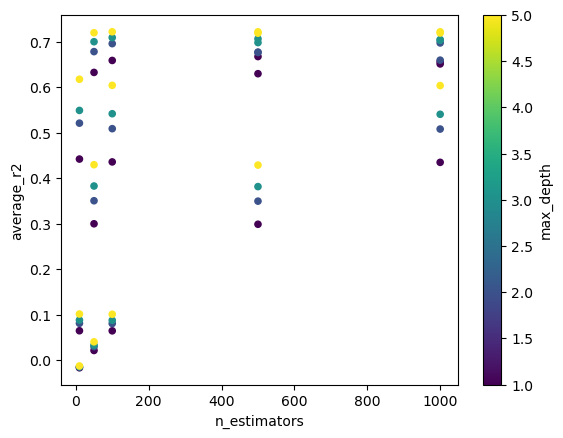

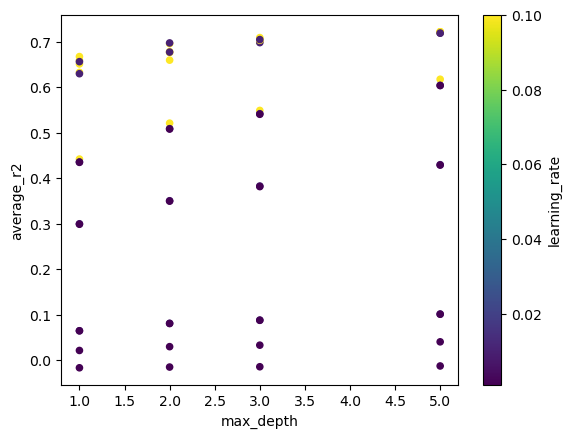

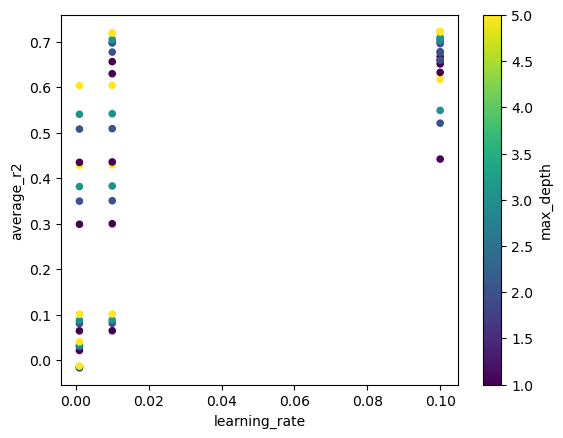

In [29]:
best_metrics, best_hps, full_results = hp_xg_boost_single_task(
    input_data=X,
    output_data=y_2,
    k=5
)

print(f"Best Metrics: {best_metrics}")
print(f"Best Hyperparameters: {best_hps}")

# Save the results
full_results.to_csv("results/jura_single_task_2_results.csv", index=False)

# Plot the results
full_results.plot.scatter(x="n_estimators", y="average_r2", c="max_depth", colormap="viridis")

full_results.plot.scatter(x="max_depth", y="average_r2", c="learning_rate", colormap="viridis")

full_results.plot.scatter(x="learning_rate", y="average_r2", c="max_depth", colormap="viridis")

100%|██████████| 60/60 [01:00<00:00,  1.01s/it]

Best Metrics: {'MSE': 0.31863435430275444, 'R2': 0.723825874485345}
Best Hyperparameters: {'num_est': 500, 'max_d': 5, 'lr': 0.01}


<Axes: xlabel='learning_rate', ylabel='average_r2'>

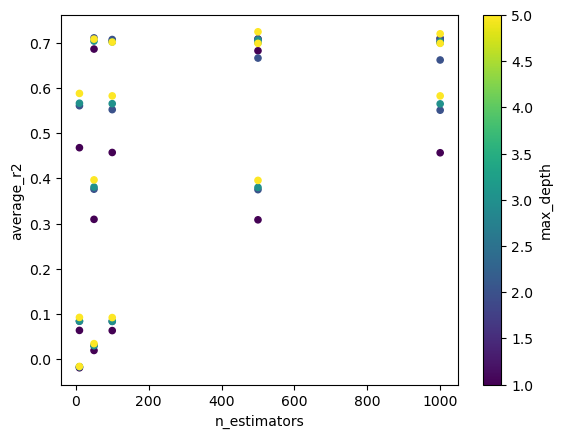

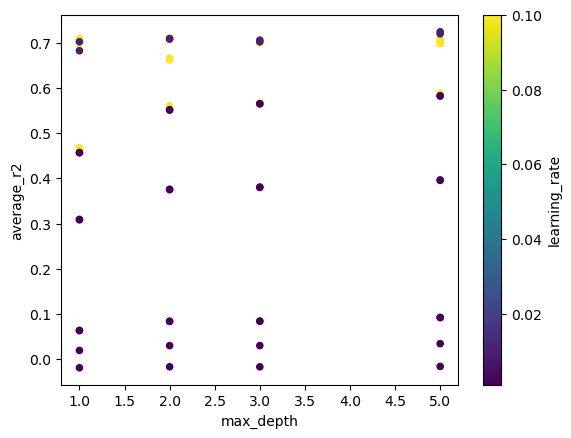

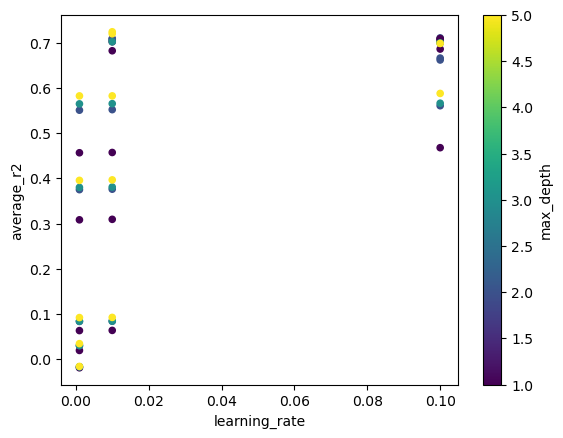

In [30]:
best_metrics, best_hps, full_results = hp_xg_boost_single_task(
    input_data=X,
    output_data=y_3,
    k=5
)

print(f"Best Metrics: {best_metrics}")
print(f"Best Hyperparameters: {best_hps}")

# Save the results
full_results.to_csv("results/jura_single_task_3_results.csv", index=False)

# Plot the results
full_results.plot.scatter(x="n_estimators", y="average_r2", c="max_depth", colormap="viridis")

full_results.plot.scatter(x="max_depth", y="average_r2", c="learning_rate", colormap="viridis")

full_results.plot.scatter(x="learning_rate", y="average_r2", c="max_depth", colormap="viridis")

100%|██████████| 180/180 [33:47<00:00, 11.27s/it] 

Best Metrics: {'MSE': array([0.45722922, 0.27688188, 0.32149966]), 'R2': array([0.5402325 , 0.71728651, 0.72033107])}
Best Hyperparameters: {'num_est': 500, 'max_d': 5, 'lr': 0.01}


Text(0.5, 1.0, 'R2 vs n_estimators')

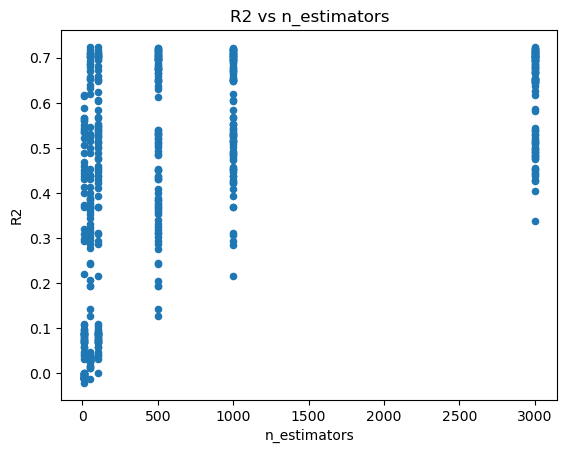

In [31]:
best_metrics, best_hps, full_results = hp_xg_boost_multi_task(
    input_data=X,
    output_data=y,
    k=5
)

print(f"Best Metrics: {best_metrics}")
print(f"Best Hyperparameters: {best_hps}")

# Save the results
full_results.to_csv("results/jura_multi_task_results.csv", index=False)

ax = full_results.plot.scatter(x="n_estimators", y="r2_0")
full_results.plot.scatter(x="n_estimators", y="r2_1", ax=ax)
full_results.plot.scatter(x="n_estimators", y="r2_2", ax=ax)
ax.set_xlabel("n_estimators")
ax.set_ylabel("R2")
ax.set_title("R2 vs n_estimators")